In [1]:
from pathlib import Path

import flopy as fp
import matplotlib.pyplot as plt

# 1. Load and explore model

In [3]:
workspace = Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\examples\\ex-gwf-fhb")
sim_name = "ex-gwf-fhb"
sim = fp.mf6.MFSimulation.load(
    sim_name=sim_name,
    version="mf6",
    exe_name="C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe",
    sim_ws=workspace
)
sim

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package sto...
    loading package chd...
    loading package wel...
    loading package oc...
    loading package obs...
  loading solution package ex-gwf-fhb...


sim_name = ex-gwf-fhb
sim_path = C:\Users\buckl\Documents\Software\mf6.4.1\examples\ex-gwf-fhb
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = ex-gwf-fhb


###################
Package ex-gwf-fhb.tdis
###################

package_name = ex-gwf-fhb.tdis
filename = ex-gwf-fhb.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-fhb


###################
Package ex-gwf-fhb
###################

package_name = ex-gwf-fhb
filename = ex-gwf-fhb.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-fhb


@@@@@@@@@@@@@@@@@@@@
Model ex-gwf-fhb
@@@@@@@@@@@@@@@@@@@@

name = ex-gwf-fhb
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = ex-gwf-f

In [4]:
sim.model_names

['ex-gwf-fhb']

In [5]:
model = sim.get_model('ex-gwf-fhb')
model

name = ex-gwf-fhb
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = ex-gwf-fhb.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-fhb


###################
Package npf
###################

package_name = npf
filename = ex-gwf-fhb.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-fhb


###################
Package ic
###################

package_name = ic
filename = ex-gwf-fhb.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-fhb


###################
Package sto
###################

package_name = sto
filename = ex-gwf-fhb.sto
package_type = sto
model_or_simulation_package = model
model_name = ex-gwf-fhb


###################
Package chd_ts
###################

package_name = chd_ts
filename = ex-gwf-fhb.chd.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-fhb
parent_file = chd


#########

In [6]:
model.package_names

['dis', 'npf', 'ic', 'sto', 'chd_ts', 'chd', 'wel_ts', 'wel', 'oc', 'obs_0']

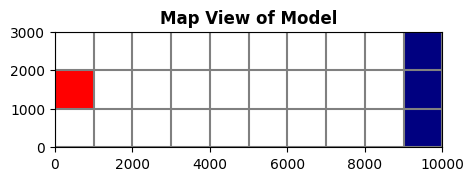

In [13]:
fig, ax = plt.subplots(figsize=(5, 1.5))
ax.set_title("Map View of Model", fontweight="bold")
mapview = fp.plot.PlotMapView(model=model, ax=ax)
mapview.plot_ibound()
mapview.plot_grid()

chd_bc = mapview.plot_bc('CHD')
wel_bc = mapview.plot_bc('WEL')

# 2. Breakdown: simulation level packages

## 2(a). [Temporal Discretization (TDIS) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mftdis.html)

In [15]:
sim.get_package('tdis')

package_name = ex-gwf-fhb.tdis
filename = ex-gwf-fhb.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-fhb

Block options
--------------------
time_units
{internal}
('days')


Block dimensions
--------------------
nper
{internal}
(3)


Block perioddata
--------------------
perioddata
{internal}
(rec.array([(400., 10, 1.), (200.,  4, 1.), (400.,  6, 1.)],
          dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))



#### Reverse-engineer

```python
time_units = "days"
nper = 3
perioddata = [
    # first stress period, transient
    (400.0, 10, 1.0),
    # second stress period, transient
    (200.0, 4, 1.0),
    # third stress period, transient
    (400.0, 6, 1.0)
]
filename = "ex-gwf-fhb.tdis"
pname = "ex-gwf-fhb.tdis"
```

## 2(b). [Iterative Model Solution (IMS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfims.html)

In [16]:
sim.get_package('ims')

package_name = ex-gwf-fhb
filename = ex-gwf-fhb.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-fhb

Block nonlinear
--------------------
outer_dvclose
{internal}
(1e-09)

outer_maximum
{internal}
(50)


Block linear
--------------------
inner_maximum
{internal}
(100)

inner_dvclose
{internal}
(1e-09)

rcloserecord
{internal}
(rec.array([('inner_rclose', 1.e-06, 'strict')],
          dtype=[('inner_rclose_label', 'O'), ('inner_rclose', '<f8'), ('rclose_option', 'O')]))



#### Reverse-engineer

```python
outer_dvclose = 1e-9
outer_maximum = 50
inner_maximum = 100
inner_dvclose = 1e-9
rcloserecord = [1e-6, "strict"]
filename = "ex-gwf-fhb.ims"
pname = "ex-gwf-fhb"
```

# 3. Breakdown: model level packages

In [17]:
model.package_names

['dis', 'npf', 'ic', 'sto', 'chd_ts', 'chd', 'wel_ts', 'wel', 'oc', 'obs_0']

## 3(a). [Structured Discretization (DIS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfdis.html)

In [18]:
model.get_package('dis')

package_name = dis
filename = ex-gwf-fhb.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
length_units
{internal}
('meters')


Block dimensions
--------------------
nlay
{internal}
(1)

nrow
{internal}
(3)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 1000.0}

delc
{constant 1000.0}

top
{constant 50.0}

botm
{constant -200.0}



#### Reverse-engineer

```python
length_units = "meters"
nlay = 1
nrow = 3
ncol = 10
delr = 1000.0
delc = 1000.0
top = 50.0
botm = -200.0
filename = "ex-gwf-fhb.dis"
pname = "dis"
```

## 3(b). [Node Property Flow (NPF) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfnpf.html)

In [19]:
model.get_package('npf')

package_name = npf
filename = ex-gwf-fhb.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
save_specific_discharge
{internal}
(True)


Block griddata
--------------------
icelltype
{constant 0}

k
{constant 20.0}



#### Reverse-engineer

```python
save_specific_discharge = True
# layer is confined
icelltype = 0
k = 20.0
filename = "ex-gwf-fhb.npf"
pname = "npf"
```

## 3(c). [Initial Conditions (IC) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfic.html)

In [20]:
model.get_package('ic')

package_name = ic
filename = ex-gwf-fhb.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block griddata
--------------------
strt
{constant 0.0}



#### Reverse-engineer

```python
# starting head
strt = 0.0
filename = "ex-gwf-fhb.ic"
pname = "ic"
```

## 3(d). [Storage (STO) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfsto.html)

In [21]:
model.get_package('sto')

package_name = sto
filename = ex-gwf-fhb.sto
package_type = sto
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
storagecoefficient
{internal}
(True)


Block griddata
--------------------
iconvert
{constant 0}

ss
{constant 1e-06}


Block period
--------------------
steady-state
None
transient
{internal}
(True)



#### Reverse-engineer

```python
# SS array is read as storage coefficient rather than specific storage
storagecoefficient = True
# confined storage is used
iconvert = 0
# storage coefficient (since flag is set)
ss = 1e-6
transient = {0: True}
filename = "ex-gwf-fhb.sto"
pname = "sto"
```

## 3(e). [Constant-Head (CHD) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfchd.html)

In [22]:
model.get_package('chd')

package_name = chd
filename = ex-gwf-fhb.chd
package_type = chd
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
ts_filerecord
{internal}
(rec.array([('ex-gwf-fhb.chd.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(3)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001BACF825F90>}


In [28]:
model.get_package('chd').stress_period_data.get_data(key=0)

rec.array([((0, 0, 9), 'chdhead'), ((0, 1, 9), 'chdhead'),
           ((0, 2, 9), 'chdhead')],
          dtype=[('cellid', 'O'), ('head', 'O')])

#### Reverse-engineer

For the constant-head package...

```python
maxbound = 3
# list of ((layer, row, column), head)
stress_period_data = [
    ((0, 0, 9), "chdhead"),
    ((0, 1, 9), "chdhead"),
    ((0, 2, 9), "chdhead")
]
filename = "ex-gwf-fhb.chd"
pname = "chd"
```

In [23]:
model.get_package('chd_ts')

package_name = chd_ts
filename = ex-gwf-fhb.chd.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-fhb
parent_file = chd

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('chdhead',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linearend',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([(   0., 0.), ( 307., 1.), ( 791., 5.), (1000., 2.)],
          dtype=[('ts_time', '<f8'), ('ts_array', '<f8')]))



#### Reverse-engineer

For the [time series](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlts.html) attached to the constant-head package...

```python
time_series_namerecord = ["chdhead"]
interpolation_methodrecord = ["linearend"]
# list of (ts_time, ts_array)
timeseries = [
    (0.0, 0.0),
    (307.0, 1.0),
    (791.0, 5.0),
    (1000.0, 2.0)
]
filename = "ex-gwf-fhb.chd.ts"
pname = "chd_ts"
```

## 3(f). [Well (WEL) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfwel.html)

In [24]:
model.get_package('wel')

package_name = wel
filename = ex-gwf-fhb.wel
package_type = wel
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
ts_filerecord
{internal}
(rec.array([('ex-gwf-fhb.wel.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(1)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001BACF834B10>}


In [29]:
model.get_package('wel').stress_period_data.get_data(key=0)

rec.array([((0, 1, 0), 'flowrate')],
          dtype=[('cellid', 'O'), ('q', 'O')])

#### Reverse-engineer

For the well package...

```python
maxbound = 1
# list of ((layer, row, column), q)
stress_period_data = [
    ((0, 1, 0), "flowrate")
]
filename = "ex-gwf-fhb.wel"
pname = "wel"
```

In [25]:
model.get_package('wel_ts')

package_name = wel_ts
filename = ex-gwf-fhb.wel.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-fhb
parent_file = wel

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('flowrate',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linearend',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([(   0., 2000.), ( 307., 6000.), ( 791., 5000.), (1000., 9000.)],
          dtype=[('ts_time', '<f8'), ('ts_array', '<f8')]))



#### Reverse-engineer

For the [time series](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlts.html) attached to the well package...

```python
time_series_namerecord = ["flowrate"]
interpolation_methodrecord = ["linearend"]
# list of (ts_time, ts_array)
timeseries = [
    (0.0, 2000.0),
    (307.0, 6000.0),
    (791.0, 5000.0),
    (1000.0, 9000.0)
]
filename = "ex-gwf-fhb.wel.ts"
pname = "wel_ts"
```

## 3(g). [Output Control (OC)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfoc.html)

In [26]:
model.get_package('oc')

package_name = oc
filename = ex-gwf-fhb.oc
package_type = oc
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block options
--------------------
budget_filerecord
{internal}
(rec.array([('ex-gwf-fhb.cbc',)],
          dtype=[('budgetfile', 'O')]))

head_filerecord
{internal}
(rec.array([('ex-gwf-fhb.hds',)],
          dtype=[('headfile', 'O')]))


Block period
--------------------
saverecord
{internal}
(rec.array([('head', 'all', None), ('budget', 'all', None)],
          dtype=[('rtype', 'O'), ('ocsetting', 'O'), ('ocsetting_data', 'O')]))

printrecord
None


#### Reverse-engineer

```python
budget_filerecord = ["ex-gwf-fhb.cbc"]
head_filerecord = ["ex-gwf-fhb.hds"]
saverecord = [
    ("head", "all"),
    ("budget", "all")
]
printrecord = None # default value
filename = "ex-gwf-fhb.oc"
pname = "oc"
```

## 3(h). [Observation (OBS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlobs.html)

In [27]:
model.get_package('obs_0')

package_name = obs_0
filename = ex-gwf-fhb.obs
package_type = obs
model_or_simulation_package = model
model_name = ex-gwf-fhb

Block continuous
--------------------
continuous
{internal}
(rec.array([('h1_2_1', 'head', (0, 1, 0), None),
           ('h1_2_10', 'head', (0, 1, 9), None)],
          dtype=[('obsname', 'O'), ('obstype', 'O'), ('id', 'O'), ('id2', 'O')]))



#### Reverse-engineer

There is also a flow observation in the `ex-gwf-fhb.obs` file.

```python
continuous = {
    "ex-gwf-fhb.obs.flow.csv": [
        ("icf1", "flow-ja-face", (0, 1, 1), (0, 1, 0))
    ],
    "ex-gwf-fhb.obs.head.csv": [
        ("h1_2_1", "head", (0, 1, 0), None),
        ("h1_2_10", "head", (0, 1, 9), None)
    ]
}
filename = "ex-gwf-fhb.obs"
pname = "obs_0"
```